In [1]:
!pip install prophet


In [2]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from prophet import Prophet
from plotly import graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import mplfinance as mpf

In [4]:
  #Connect to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
merged_df = pd.read_csv('/content/drive/MyDrive/Masters/Dissertation/13-08-24/merged_data_SPX 500.csv')
merged_df.tail()

,Date,Open,High,Low,Close,Volume,Mid,SMA50,SMA100,SMA150,...,OBV,BollingerUp_mid,BollingerDown_mid,RSI,macd,macd_h,macd_s,%K,%D,Capped Sentiment
2299,2024-08-06,5206.419922,5312.339844,5193.560059,5240.029785,4.690190e+09,5223.224853,5446.987798,5309.117097,5187.315464,...,5.103422e+11,5681.930695,5212.044901,28.980956,-46.930240,-41.094241,-5.835999,24.408337,16.616250,-0.01200
2300,2024-08-07,5293.129883,5330.640137,5195.540039,5199.500000,4.558260e+09,5246.314941,5446.052393,5309.952146,5190.664129,...,5.057840e+11,5683.851374,5208.253411,32.078590,-55.733148,-39.917719,-15.815429,17.215976,18.317421,0.00851
2301,2024-08-08,5252.569824,5328.029785,5233.850098,5319.310059,4.016830e+09,5285.939942,5445.551689,5311.609546,5194.470796,...,5.098008e+11,5684.613622,5206.489757,37.293747,-58.833909,-34.414784,-24.419125,42.921872,28.182061,0.05004
2302,2024-08-09,5314.660156,5358.669922,5300.839844,5344.160156,3.516400e+09,5329.410156,5446.683091,5313.382698,5198.713197,...,5.133172e+11,5682.927602,5210.438579,42.660308,-57.125098,-26.164779,-30.960319,48.253594,36.130481,-0.00573
2303,2024-08-12,5351.879883,5371.200195,5324.370117,5344.390137,3.360160e+09,5348.135010,5448.693291,5315.276050,5203.074730,...,5.166773e+11,5679.676293,5217.710289,44.916574,-53.641568,-18.144999,-35.496569,50.375962,47.183809,0.07521


In [6]:
historical_data = merged_df.copy()

# 1. Trend prediction using Prophet Algorithm

https://facebook.github.io/prophet/docs/quick_start.html

https://github.com/facebook/prophet?tab=readme-ov-file

In [7]:
# Get the date range from dataset dataset
start_date_dataset = historical_data['Date'].min()
end_date_dataset = historical_data['Date'].max()


In [8]:
# Function to get user input for date range and prediction period
def get_user_input():
    start_date = input(f"Enter the start date between {start_date_dataset} and {end_date_dataset} (YYYY-MM-DD): ")
    end_date = input(f"Enter the end date between {start_date_dataset} and {end_date_dataset} ((YYYY-MM-DD): ")
    prediction_days = int(input("Enter the number of days to predict: "))
    return start_date, end_date, prediction_days

# Get user input
start_date, end_date, prediction_days = get_user_input()


Enter the start date between 2015-06-17 and 2024-08-12 (YYYY-MM-DD): 2020-01-01
Enter the end date between 2015-06-17 and 2024-08-12 ((YYYY-MM-DD): 2024-08-01
Enter the number of days to predict: 20


DEBUG:cmdstanpy:input tempfile: /tmp/tmpeimrw4ed/68yyci2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeimrw4ed/ei9_4avx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25363', 'data', 'file=/tmp/tmpeimrw4ed/68yyci2_.json', 'init=/tmp/tmpeimrw4ed/ei9_4avx.json', 'output', 'file=/tmp/tmpeimrw4ed/prophet_modelp2l5dc3u/prophet_model-20240815085634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:56:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:56:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

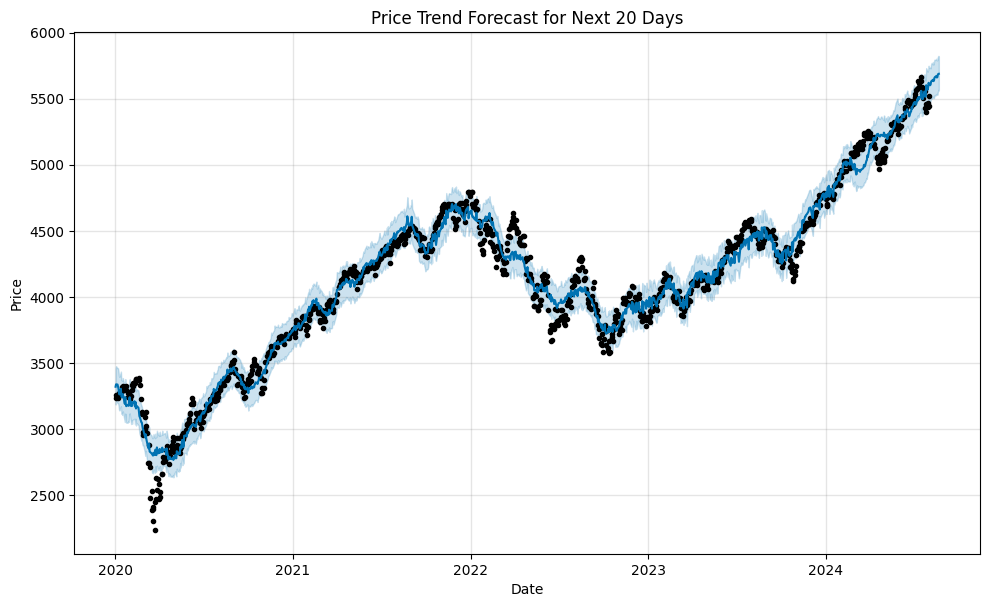

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

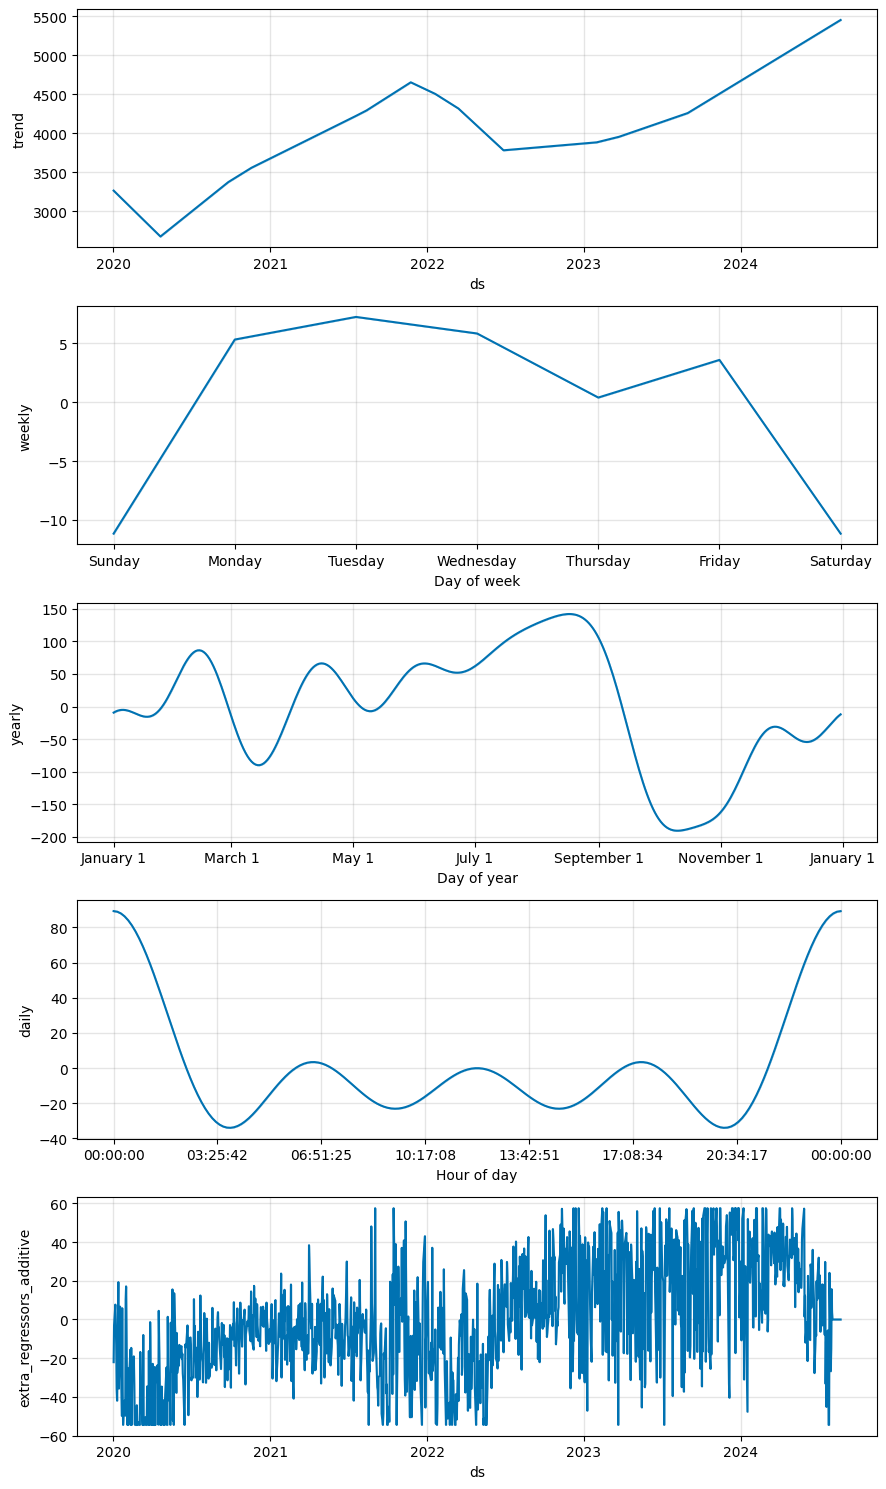

             ds         yhat   yhat_lower   yhat_upper
1153 2024-08-02  5611.375638  5469.698255  5736.279751
1154 2024-08-03  5601.267195  5477.756072  5735.170490
1155 2024-08-04  5605.867467  5480.977832  5728.961462
1156 2024-08-05  5626.903159  5499.950155  5758.156001
1157 2024-08-06  5633.346811  5505.556876  5770.004255
1158 2024-08-07  5636.419208  5500.333963  5768.404782
1159 2024-08-08  5635.410666  5505.331460  5760.035232
1160 2024-08-09  5642.975846  5515.074204  5777.600680
1161 2024-08-10  5632.536455  5504.345888  5758.020440
1162 2024-08-11  5636.763342  5504.591087  5778.153401
1163 2024-08-12  5657.372915  5524.241261  5795.072666
1164 2024-08-13  5663.326725  5528.372448  5793.270595
1165 2024-08-14  5665.833895  5522.585004  5794.924253
1166 2024-08-15  5664.172468  5527.490713  5793.030851
1167 2024-08-16  5670.984310  5535.201223  5803.013868
1168 2024-08-17  5659.677936  5534.106555  5789.371631
1169 2024-08-18  5662.910789  5528.626020  5791.353821
1170 2024-

In [9]:
# Reset index to move 'Date' from index to column if it is an index
if historical_data.index.name == 'Date':
    historical_data = historical_data.reset_index()

# Filter historical data based on the user-provided date range
filtered_data = historical_data[(historical_data['Date'] >= start_date) & (historical_data['Date'] <= end_date)]

# Prepare the data for Prophet with sentiment as a regressor
data = filtered_data[['Date', 'Close', 'Capped Sentiment', 'Open', 'High', 'Low', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y'})
data['ds'] = pd.to_datetime(data['ds']) # Convert 'ds' column to datetime objects

# Initialize the Prophet model
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.add_regressor('Capped Sentiment')
model.fit(data)

# Add future sentiment data
future_sentiment = data[['ds', 'Capped Sentiment']].copy()
future_dates = pd.date_range(start=data['ds'].max() + pd.Timedelta(days=1), periods=prediction_days)
future_sentiment = pd.concat([future_sentiment, pd.DataFrame({'ds': future_dates, 'Capped Sentiment': [data['Capped Sentiment'].mean()] * prediction_days})])

# Make future predictions
future = model.make_future_dataframe(periods=prediction_days)
future = future.merge(future_sentiment, on='ds', how='left')
forecast = model.predict(future)

# Fix the deprecated function usage here
forecast['ds'] = pd.to_datetime(forecast['ds'])
fcst_t = np.array(forecast['ds'])  # Instead of using .dt.to_pydatetime()

# Plot the forecast
fig = model.plot(forecast)
plt.title(f"Price Trend Forecast for Next {prediction_days} Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Display the forecast data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(prediction_days))

In [11]:
# Create candlestick chart for the forecasted period
# Prepare the data for candlestick plot
forecasted_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(prediction_days)
forecasted_data = forecasted_data.rename(columns={'ds': 'Date', 'yhat': 'Close', 'yhat_lower': 'Low', 'yhat_upper': 'High'})
forecasted_data['Open'] = forecasted_data['Close'].shift(1)
forecasted_data = forecasted_data.dropna()

# Create candlestick chart using plotly
fig_candlestick = go.Figure(data=[go.Candlestick(x=forecasted_data['Date'],
                                                 open=forecasted_data['Open'],
                                                 high=forecasted_data['High'],
                                                 low=forecasted_data['Low'],
                                                 close=forecasted_data['Close'])])

fig_candlestick.update_layout(title=f"Candlestick Chart for Forecasted Period ({prediction_days} Days)", xaxis_title="Date", yaxis_title="Price")
fig_candlestick.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
